In [105]:
%load_ext autoreload
%autoreload 2
import math
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from airquality.data.prepare_data import create_model_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def load_passengers():
    air_passengers = pd.read_csv('/Users/b.yc0006/Cloud/BCNAirQualityDatathon/data/raw/AirPassengers.csv')
    air_passengers = air_passengers.set_index('Month')['#Passengers']
    return air_passengers


In [107]:
air_passengers = load_passengers()
scaler = MinMaxScaler(feature_range=(0, 1))
air_passengers = scaler.fit_transform(air_passengers.values.reshape([-1, 1]))
air_passengers = pd.DataFrame(air_passengers, columns=['passengers'])

In [108]:
air_passengers.head()

,passengers
0,0.015444
1,0.027027
2,0.054054
3,0.048263
4,0.032819


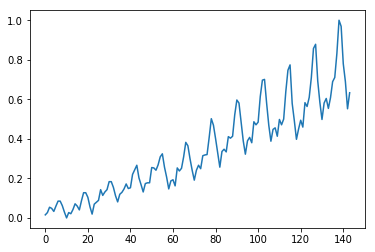

In [109]:
plt.plot(air_passengers)
plt.show()

In [110]:
model_matrix = create_model_matrix(target=air_passengers, lags=1)

In [124]:
# split into train and test sets
train_size = int(len(model_matrix) * 0.67)
test_size = len(model_matrix) - train_size
trainX, testX = model_matrix.iloc[0:train_size,1].values, model_matrix.iloc[train_size:len(model_matrix),1].values
trainY, testY = model_matrix.iloc[0:train_size,0].values, model_matrix.iloc[train_size:len(model_matrix),0].values
print(len(trainX), len(testX))

(95, 48)


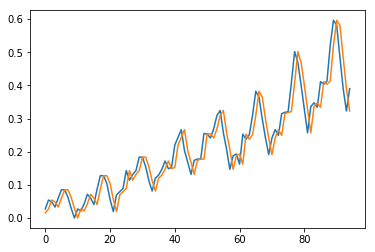

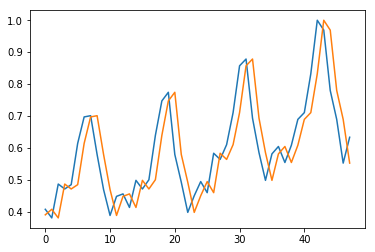

In [125]:
plt.plot(trainY)
plt.plot(trainX)
plt.show()

plt.plot(testY)
plt.plot(testX)
plt.show()

In [71]:
def reshape_to_keras(data):
    return np.reshape(data.values, [-1, 1, 1])

In [83]:
trainX = reshape_to_keras(trainX)
testX = reshape_to_keras(testX)

In [31]:
batch_size = 1
lags = 1

model = Sequential()
model.add(LSTM(4, input_shape=(batch_size, lags)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.0557
Epoch 2/100
 - 1s - loss: 0.0260
Epoch 3/100
 - 1s - loss: 0.0193
Epoch 4/100
 - 1s - loss: 0.0173
Epoch 5/100
 - 1s - loss: 0.0162
Epoch 6/100
 - 1s - loss: 0.0151
Epoch 7/100
 - 1s - loss: 0.0140
Epoch 8/100
 - 1s - loss: 0.0127
Epoch 9/100
 - 1s - loss: 0.0118
Epoch 10/100
 - 1s - loss: 0.0105
Epoch 11/100
 - 1s - loss: 0.0095
Epoch 12/100
 - 1s - loss: 0.0086
Epoch 13/100
 - 1s - loss: 0.0076
Epoch 14/100
 - 1s - loss: 0.0068
Epoch 15/100
 - 1s - loss: 0.0059
Epoch 16/100
 - 1s - loss: 0.0052
Epoch 17/100
 - 1s - loss: 0.0046
Epoch 18/100
 - 1s - loss: 0.0040
Epoch 19/100
 - 1s - loss: 0.0035
Epoch 20/100
 - 1s - loss: 0.0032
Epoch 21/100
 - 1s - loss: 0.0029
Epoch 22/100
 - 1s - loss: 0.0027
Epoch 23/100
 - 1s - loss: 0.0025
Epoch 24/100
 - 1s - loss: 0.0024
Epoch 25/100
 - 1s - loss: 0.0023
Epoch 26/100
 - 1s - loss: 0.0023
Epoch 27/100
 - 1s - loss: 0.0022
Epoch 28/100
 - 1s - loss: 0.0022
Epoch 29/100
 - 1s - loss: 0.0022
Epoch 30/100
 - 1s - lo

In [84]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

# invert predictions
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

In [91]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

(95, 1) (95, 1)
Train Score: 31474404759.85 RMSE
Test Score: 58503020154.59 RMSE


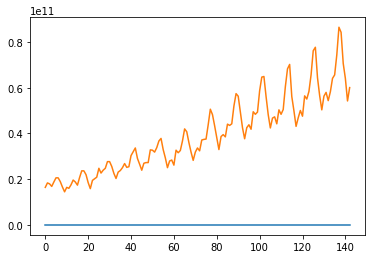

In [104]:
plt.plot(list(trainPredict)+list(testPredict))
plt.plot(list(trainY)+list(testY))
plt.show()

In [96]:
trainPredictPlot = np.empty_like(air_passengers)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lags:len(trainPredict)+lags, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(air_passengers)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lags*2)+1:len(air_passengers)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(air_passengers))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (48,1) into shape (45,1)

In [ ]:
len(air_passengers)-1